In [1]:
import pandas as pd
import datetime
from tqdm import tqdm
import re
from IPython.core.pylabtools import figsize
import optuna
import operator
import numpy as np
import matplotlib.pyplot as plt
from itables import init_notebook_mode

init_notebook_mode(all_interactive=True)


import numpy as np
import pandas as pd
import scipy.stats as stats
import sklearn
import statsmodels.api as sm

import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")

# special matplotlib argument for improved plots
#from matplotlib import rcParams
from sklearn.model_selection import train_test_split

import requests
from datetime import timedelta

c:\Users\Admin\AppData\Local\Programs\Python\Python38\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


<IPython.core.display.Javascript object>

In [2]:
def test_live(sample_duration):
    def vn30f():
        return requests.get("https://services.entrade.com.vn/chart-api/chart?from=1651727820&resolution=1&symbol=VN30F1M&to=9999999999").json()
    vn30fm = pd.DataFrame(vn30f()).iloc[:,:6]
    vn30fm['t'] = vn30fm['t'].astype(int).apply(lambda x: datetime.datetime.utcfromtimestamp(x) + timedelta(hours = 7))
    vn30fm.columns = ['Date','Open','High','Low','Close','Volume']
    s = pd.read_csv('C:\python\VN30F1M.csv')
    s['Date'] = pd.to_datetime(s['Date']) + timedelta(hours =7)
    ohlc_dict = {                                                                                                             
        'Open': 'first',                                                                                                    
        'High': 'max',                                                                                                       
        'Low': 'min',                                                                                                        
        'Close': 'last',                                                                                                    
        'Volume': 'sum',}
    vn30fm = pd.DataFrame(vn30f()).iloc[:,:6]
    vn30fm['t'] = vn30fm['t'].astype(int).apply(lambda x: datetime.datetime.utcfromtimestamp(x) + timedelta(hours = 7))
    vn30fm.columns = ['Date','Open','High','Low','Close','Volume']
    def process_data(input_df):
        vn30train = pd.DataFrame(input_df.resample(str(sample_duration)+'Min', on='Date', label='left').apply(ohlc_dict).dropna()).reset_index()#change s
        vn30train['Date'] = [str(i)[:16] for i in vn30train['Date']]
        return vn30train
    vn30f_base = pd.concat([process_data(vn30fm), process_data(s)]).sort_values('Date').drop_duplicates('Date').sort_values('Date')
    return vn30f_base

In [351]:
# data = test_live(15)
# dff = data[['Date', 'Open']]
# dff['Date'] = pd.to_datetime(dff['Date'])
# dff['Date'].apply(lambda x:x.hour)
# df1 = dff.loc[(dff['Date'].apply(lambda x:x.minute)==30)&(dff['Date'].apply(lambda x:x.hour)==11)]
# df1.Date = [str(i)[:10] for i in df1.Date]

# df = data[['Date', 'Close']]
# df['Date'] = pd.to_datetime(df['Date'])
# df['Date'].apply(lambda x:x.hour)
# df2 = df.loc[(df['Date'].apply(lambda x:x.minute)==00)&(df['Date'].apply(lambda x:x.hour)==13)]
# df2.Date = [str(i)[:10] for i in df2.Date]

# df3 = df.loc[(df['Date'].apply(lambda x:x.minute)==30)&(df['Date'].apply(lambda x:x.hour)==13)]
# df3.Date = [str(i)[:10] for i in df3.Date]

# df4 = df.loc[(df['Date'].apply(lambda x:x.minute)==45)&(df['Date'].apply(lambda x:x.hour)==13)]
# df4.Date = [str(i)[:10] for i in df4.Date]

# df5 = df.loc[(df['Date'].apply(lambda x:x.minute)==00)&(df['Date'].apply(lambda x:x.hour)==14)]
# df5.Date = [str(i)[:10] for i in df5.Date]

# df6 = df.loc[(df['Date'].apply(lambda x:x.minute)==30)&(df['Date'].apply(lambda x:x.hour)==14)]
# df6.Date = [str(i)[:10] for i in df6.Date]


# ds = df1.merge(df2, how = 'inner', on = 'Date').merge(df3, how = 'inner', on = 'Date').merge(df4, how = 'inner', on = 'Date').merge(df5, how = 'inner', on = 'Date').merge(df6, how = 'inner', on = 'Date')
# ds.columns = ['Date', 'Open', '13:00', '13:30', '13:45', '14:00', '14:30']


# high = df.loc[(df['Date'].apply(lambda x:x.minute)==00)&(df['Date'].apply(lambda x:x.hour)==11)]
# high.Date = [str(i)[:10] for i in high.Date]
# high.columns = ['Date', 'High']


# data['Day'] = [str(i)[:10] for i in data.Date]
# high = data[['Day','High']].groupby('Day').max()
# low = findlow[['Day','Low']].groupby('Day').min()
# high['Date'] = high.index

# low['Date'] = low.index
#ds = ds.merge(high, how='left', on='Date')

C:\Users\Admin\AppData\Local\Temp\ipykernel_8476\2127745935.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dff['Date'] = pd.to_datetime(dff['Date'])
C:\Users\Admin\AppData\Local\Temp\ipykernel_8476\2127745935.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.Date = [str(i)[:10] for i in df1.Date]
C:\Users\Admin\AppData\Local\Temp\ipykernel_8476\2127745935.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

In [382]:
data = test_live(15)

dff = data[['Date', 'Open']]
dff['Date'] = pd.to_datetime(dff['Date'])
dff['Date'].apply(lambda x:x.hour)
df1 = dff.loc[(dff['Date'].apply(lambda x:x.minute)==00)&(dff['Date'].apply(lambda x:x.hour)==9)]
df1.Date = [str(i)[:10] for i in df1.Date]

df = data[['Date', 'Close']]
df['Date'] = pd.to_datetime(df['Date'])
df['Date'].apply(lambda x:x.hour)
df2 = df.loc[(df['Date'].apply(lambda x:x.minute)==15)&(df['Date'].apply(lambda x:x.hour)==9)]
df2.Date = [str(i)[:10] for i in df2.Date]

df3 = df.loc[(df['Date'].apply(lambda x:x.minute)==30)&(df['Date'].apply(lambda x:x.hour)==9)]
df3.Date = [str(i)[:10] for i in df3.Date]

df4 = df.loc[(df['Date'].apply(lambda x:x.minute)==00)&(df['Date'].apply(lambda x:x.hour)==10)]
df4.Date = [str(i)[:10] for i in df4.Date]

ds = df1.merge(df2, how = 'inner', on = 'Date').merge(df3, how = 'inner', on = 'Date').merge(df4, how = 'inner', on = 'Date')
ds.columns = ['Date', 'Open', '9:15', '9:30', '10:00']

df10 = data[['Date', 'Low']]
df10['Date'] = pd.to_datetime(df10['Date'])


findlow = df10.loc[(df10['Date'].apply(lambda x:x.hour)>10)]
findlow['Day'] = [str(i)[:10] for i in findlow.Date]


data['Day'] = [str(i)[:10] for i in data.Date]
#high = data[['Day','High']].groupby('Day').max()
low = findlow[['Day','Low']].groupby('Day').min()
#high['Date'] = high.index

low['Date'] = low.index
ds = ds.merge(low, how='left', on='Date')

C:\Users\Admin\AppData\Local\Temp\ipykernel_8476\1392670150.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dff['Date'] = pd.to_datetime(dff['Date'])
C:\Users\Admin\AppData\Local\Temp\ipykernel_8476\1392670150.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.Date = [str(i)[:10] for i in df1.Date]
C:\Users\Admin\AppData\Local\Temp\ipykernel_8476\1392670150.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = va

In [245]:

# df3 = df.loc[(df['Date'].apply(lambda x:x.minute)==20)&(df['Date'].apply(lambda x:x.hour)==9)]
# df3.Date = [str(i)[:10] for i in df3.Date]

# df4 = df.loc[(df['Date'].apply(lambda x:x.minute)==25)&(df['Date'].apply(lambda x:x.hour)==9)]
# df4.Date = [str(i)[:10] for i in df4.Date]

# df5 = df.loc[(df['Date'].apply(lambda x:x.minute)==30)&(df['Date'].apply(lambda x:x.hour)==9)]
# df5.Date = [str(i)[:10] for i in df5.Date]

# df6 = df.loc[(df['Date'].apply(lambda x:x.minute)==35)&(df['Date'].apply(lambda x:x.hour)==9)]
# df6.Date = [str(i)[:10] for i in df6.Date]

# df7 = df.loc[(df['Date'].apply(lambda x:x.minute)==40)&(df['Date'].apply(lambda x:x.hour)==9)]
# df7.Date = [str(i)[:10] for i in df7.Date]

# df8 = df.loc[(df['Date'].apply(lambda x:x.minute)==45)&(df['Date'].apply(lambda x:x.hour)==9)]
# df8.Date = [str(i)[:10] for i in df8.Date]

# df9 = df.loc[(df['Date'].apply(lambda x:x.minute)==50)&(df['Date'].apply(lambda x:x.hour)==9)]
# df9.Date = [str(i)[:10] for i in df9.Date]

# df10 = df.loc[(df['Date'].apply(lambda x:x.minute)==55)&(df['Date'].apply(lambda x:x.hour)==9)]
# df10.Date = [str(i)[:10] for i in df10.Date]

# df11 = df.loc[(df['Date'].apply(lambda x:x.minute)==00)&(df['Date'].apply(lambda x:x.hour)==10)]
# df11.Date = [str(i)[:10] for i in df11.Date]

# df12 = df.loc[(df['Date'].apply(lambda x:x.minute)==5)&(df['Date'].apply(lambda x:x.hour)==10)]
# df12.Date = [str(i)[:10] for i in df12.Date]


# df13 = df.loc[(df['Date'].apply(lambda x:x.minute)==10)&(df['Date'].apply(lambda x:x.hour)==10)]
# df13.Date = [str(i)[:10] for i in df13.Date]

In [383]:
X = ds.drop(['Low', 'Date'], axis = 1)
Y = ds['Low']
X_train = X.loc[:900]
X_test = X.loc[900:]
Y_train = Y.loc[:900]
Y_test = Y.loc[900:]

Text(0.5, 1.0, 'Prices vs Predicted prices: $Y_i$ vs $\\hat{Y}_i$')

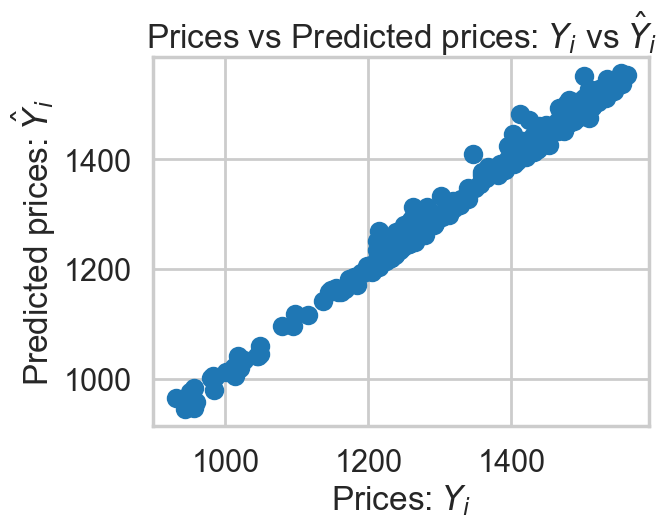

In [384]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(X_train, Y_train)

Y_pred = lm.predict(X_test)

plt.scatter(Y_test, Y_pred)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")

In [360]:
# Y_test = pd.DataFrame(Y_test)
# Y_test['pred'] = Y_pred

# ope = data[['Date', 'Close']]
# ope['Date'] = pd.to_datetime(ope['Date'])
# ope['Date'].apply(lambda x:x.hour)
# op = ope.loc[(ope['Date'].apply(lambda x:x.minute)==30)&(ope['Date'].apply(lambda x:x.hour)==14)]
# op.Date = [str(i)[:10] for i in op.Date]

# Y_test['Date'] = ds.Date.iloc[900:]
# Y_test = Y_test.merge(op, how='inner', on='Date')
# Y_test.drop('Date', axis = 1)
# Y_test['acu'] = Y_test.pred - Y_test.Close
# Y_test['Date'] = [str(i)+ ' 14:30' for i in Y_test.Date]
# Y_test.Date = [str(i) for i in Y_test.Date]
# Y_test

C:\Users\Admin\AppData\Local\Temp\ipykernel_8476\69220971.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ope['Date'] = pd.to_datetime(ope['Date'])
C:\Users\Admin\AppData\Local\Temp\ipykernel_8476\69220971.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  op.Date = [str(i)[:10] for i in op.Date]


High         pred              Date   Close        acu
0    1436.8  1436.474029  2021-09-09 14:30  1445.4  -8.925971
1    1447.8  1448.246977  2021-09-10 14:30  1448.1   0.146977
2    1447.0  1447.037138  2021-09-13 14:30  1442.5   4.537138
3    1443.6  1441.972674  2021-09-14 14:30  1436.1   5.872674
4    1436.0  1438.922467  2021-09-15 14:30  1448.7  -9.777533
..      ...          ...               ...     ...        ...
287  1017.7  1018.833653  2022-11-02 14:30  1020.7  -1.866347
288  1019.0  1017.504119  2022-11-03 14:30  1008.7   8.804119
289   962.0   964.050625  2022-11-04 14:30   981.7 -17.649375
290   966.3   969.837171  2022-11-07 14:30   958.5  11.337171
291   958.3   958.452403  2022-11-08 14:30   970.3 -11.847597

[292 rows x 5 columns]

In [385]:
Y_test = pd.DataFrame(Y_test)
Y_test['pred'] = Y_pred

ope = data[['Date', 'Open']]
ope['Date'] = pd.to_datetime(ope['Date'])
ope['Date'].apply(lambda x:x.hour)
op = ope.loc[(ope['Date'].apply(lambda x:x.minute)==15)&(ope['Date'].apply(lambda x:x.hour)==10)]
op.Date = [str(i)[:10] for i in op.Date]

Y_test['Date'] = ds.Date.iloc[900:]
Y_test = Y_test.merge(op, how='inner', on='Date')
Y_test.drop('Date', axis = 1)
Y_test['dev'] = Y_test.pred - Y_test.Open
Y_test['Date'] = [str(i)+ ' 10:15' for i in Y_test.Date]
Y_test.Date = [str(i) for i in Y_test.Date]
Y_test

C:\Users\Admin\AppData\Local\Temp\ipykernel_8476\4181403158.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ope['Date'] = pd.to_datetime(ope['Date'])
C:\Users\Admin\AppData\Local\Temp\ipykernel_8476\4181403158.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  op.Date = [str(i)[:10] for i in op.Date]


Low         pred              Date    Open        dev
0    1192.4  1192.478934  2021-03-22 10:15  1204.9 -12.421066
1    1180.0  1184.625985  2021-03-23 10:15  1194.9 -10.274015
2    1155.3  1165.950741  2021-03-24 10:15  1176.8 -10.849259
3    1158.1  1156.837740  2021-03-25 10:15  1167.0 -10.162260
4    1145.1  1158.585240  2021-03-26 10:15  1166.8  -8.214760
..      ...          ...               ...     ...        ...
407  1001.1  1011.490135  2022-11-03 10:15  1017.0  -5.509865
408   958.6   957.747235  2022-11-04 10:15   972.0 -14.252765
409   950.0   974.703127  2022-11-07 10:15   982.2  -7.496873
410   955.6   946.696262  2022-11-08 10:15   951.2  -4.503738
411   956.3   982.712783  2022-11-09 10:15   985.9  -3.187217

[412 rows x 5 columns]

In [361]:
# Y_test['per'] = (Y_test.pred-Y_test.High)/Y_test.High
# Y_test

High         pred              Date   Close        acu       per
0    1436.8  1436.474029  2021-09-09 14:30  1445.4  -8.925971 -0.000227
1    1447.8  1448.246977  2021-09-10 14:30  1448.1   0.146977  0.000309
2    1447.0  1447.037138  2021-09-13 14:30  1442.5   4.537138  0.000026
3    1443.6  1441.972674  2021-09-14 14:30  1436.1   5.872674 -0.001127
4    1436.0  1438.922467  2021-09-15 14:30  1448.7  -9.777533  0.002035
..      ...          ...               ...     ...        ...       ...
287  1017.7  1018.833653  2022-11-02 14:30  1020.7  -1.866347  0.001114
288  1019.0  1017.504119  2022-11-03 14:30  1008.7   8.804119 -0.001468
289   962.0   964.050625  2022-11-04 14:30   981.7 -17.649375  0.002132
290   966.3   969.837171  2022-11-07 14:30   958.5  11.337171  0.003661
291   958.3   958.452403  2022-11-08 14:30   970.3 -11.847597  0.000159

[292 rows x 6 columns]

In [366]:
# Y_test['dev'] = Y_test.pred-Y_test.High
# Y_test

High         pred              Date   Close        acu       per  \
0    1436.8  1436.474029  2021-09-09 14:30  1445.4  -8.925971 -0.000227   
1    1447.8  1448.246977  2021-09-10 14:30  1448.1   0.146977  0.000309   
2    1447.0  1447.037138  2021-09-13 14:30  1442.5   4.537138  0.000026   
3    1443.6  1441.972674  2021-09-14 14:30  1436.1   5.872674 -0.001127   
4    1436.0  1438.922467  2021-09-15 14:30  1448.7  -9.777533  0.002035   
..      ...          ...               ...     ...        ...       ...   
287  1017.7  1018.833653  2022-11-02 14:30  1020.7  -1.866347  0.001114   
288  1019.0  1017.504119  2022-11-03 14:30  1008.7   8.804119 -0.001468   
289   962.0   964.050625  2022-11-04 14:30   981.7 -17.649375  0.002132   
290   966.3   969.837171  2022-11-07 14:30   958.5  11.337171  0.003661   
291   958.3   958.452403  2022-11-08 14:30   970.3 -11.847597  0.000159   

          dev  
0   -0.325971  
1    0.446977  
2    0.037138  
3   -1.627326  
4    2.922467  
..        ...  
287  1.133653  
288 -1.495881  
289  2.050625  
290  3.537171  
291  0.152403  

[292 rows x 7 columns]

In [371]:
#create signal
# sig = Y_test[['Date', 'acu']]
# signal = data.merge(sig, how='left', on='Date')
# signal = signal.fillna(0)

# ok = Y_test[['Date', 'pred']]
# signal = signal.merge(ok, how='left', on='Date')
# signal = signal.fillna(method='pad')

In [386]:
Y_test['accu'] = (Y_test.Low - Y_test.pred)

In [389]:
#create signal
sig = Y_test[['Date', 'dev']]
signal = pd.DataFrame()
signal = data.merge(sig, how='left', on='Date')
signal = signal.fillna(100)

ok = Y_test[['Date', 'pred']]
signal = signal.merge(ok, how='left', on='Date')
signal = signal.fillna(method='pad')

In [390]:
signal

Date   Open   High    Low  Close   Volume         Day  \
0      2017-08-10 09:15  757.9  757.9  755.5  755.5     26.0  2017-08-10   
1      2017-08-10 09:30  755.1  755.1  753.8  753.8     21.0  2017-08-10   
2      2017-08-10 09:45  753.6  753.6  752.3  752.3     13.0  2017-08-10   
3      2017-08-10 10:00  752.0  752.0  750.4  750.4     17.0  2017-08-10   
4      2017-08-10 10:15  750.0  750.0  748.2  748.2     20.0  2017-08-10   
...                 ...    ...    ...    ...    ...      ...         ...   
24896  2022-11-09 13:45  970.4  977.8  969.7  977.6  28078.0  2022-11-09   
24897  2022-11-09 14:00  977.8  979.8  970.7  971.8  37232.0  2022-11-09   
24898  2022-11-09 14:15  971.4  971.6  956.3  962.3  52009.0  2022-11-09   
24899  2022-11-09 14:30  962.9  962.9  962.9  962.9     62.0  2022-11-09   
24900  2022-11-09 14:45  959.0  959.0  959.0  959.0   9100.0  2022-11-09   

         dev        pred  
0      100.0         NaN  
1      100.0         NaN  
2      100.0         NaN  
3      100.0         NaN  
4      100.0         NaN  
...      ...         ...  
24896  100.0  982.712783  
24897  100.0  982.712783  
24898  100.0  982.712783  
24899  100.0  982.712783  
24900  100.0  982.712783  

[24901 rows x 9 columns]

100%|██████████| 24888/24888 [00:00<00:00, 64562.71it/s]


<AxesSubplot:>

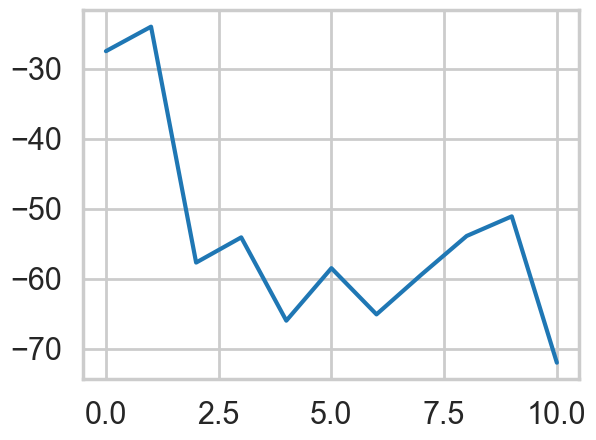

In [395]:
buy = 0 
profit = []
date = []
time = 0
position = []
cash = 1209
for i in tqdm(range(len(signal)-13)):
    if buy == 0 and -5 < signal.dev.iloc[i] < 20:# and signal.Open.iloc[i] - signal.Close.iloc[i-4] < -1.5:
        buy = signal.Open.iloc[i]
        position.append(1)
        time = i
        date.append(signal.Date.iloc[i])

    if buy != 0 and i - time >= 1:
        if (signal.Open.iloc[i] - buy) < -2 or (i - time) == 13:
            profit.append(buy - signal.Open.iloc[i])
            date.append(signal.Date.iloc[i])
            position.append(0)
            cash = cash - 0.05 + (buy - signal.Open.iloc[i] )
            buy = 0

# haha = pd.DataFrame()
# haha['Date'] = date
# haha['pos'] = position


# short = data.merge(haha, how = 'left', on='Date')
# short = short.fillna(method='pad').dropna()
# short.set_index('Date', inplace=True)


# pnl = (-(short['Open'].shift(-1) - short['Open'])*short['pos']).cumsum()
# pnl.index = pd.to_datetime(pnl.index)
# pnl.plot(figsize = (10,5))
pd.Series(profit).cumsum().plot()